In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

Funciones

In [2]:
#Función graficadora de dispersión
def graficadora(independiente, dependiente, numero):
    #Generación de datos para la variable independiente.
    x =np.random.uniform(1, 3, numero) # Instrucción de la actividad 2.1.2

    #Generación de variable auxiliar para introducir aleatoriedad en la dependiente
    intermedia = np.random.uniform(2, 4, numero) # Instrucción de la actividad 2.1.3

    y = 5 + 2 * x + intermedia

    grafico_dispersion = plt.scatter(x, y, alpha = 0.5) # Instrucción de la actividad 2.1.4
    plt.title(f" gráfico dispersión {independiente}, {dependiente}")
    plt.xlabel(f"{independiente}")
    plt.ylabel(f"{dependiente}")
    plt.grid(True)
    
    plt.savefig(f"gráfico dispersión {independiente}-{dependiente}.png")
    plt.show()

#Función que ejecuta la regresión sobre variables independiente y dependiente

def regresion(independiente, dependiente): # Instrucción de la actividad 2.1.5
    independiente=independiente.reshape(-1, 1)

    X = np.hstack((np.ones((len(independiente), 1)), independiente))

    #hacemos una regresión a partir del método de las matrices
    beta = np.linalg.inv(X.T @ X) @ X.T @ dependiente # Instrucción de la actividad 2.1.6
    return beta



#Función graficadora de regresión. Agrega la línea de regresión al gráfico de dispersión.
def graficadora_regresion(independiente, dependiente, beta): # Instrucción de la actividad 2.1.7
    plt.scatter(independiente, dependiente)
    x_pred = np.linspace(0, 4, 1000).reshape(-1, 1)
    y_pred = beta[0] + beta[1] * x_pred
    plt.plot(x_pred, y_pred, 'r-')

    plt.title("Gráfico de dispersión con línea de regresión agregada")
    plt.xlabel("Variable independiente")
    plt.ylabel("Variable dependiente")
    plt.grid(True)

    plt.savefig("grafico con línea.png")


In [3]:
#Definimos variable independiente
independiente= np.random.uniform(0, 3, size=1000)

#Definimos una auxiliar para generar la dependiente.
auxiliar = np.random.uniform(2, 4, size=1000)

#Definimos la variable dependiente a partir de las instrucciones
dependiente=5 * independiente + auxiliar

#Convertimos en dataframe para usarla luego
dataframe = pd.DataFrame({"Independiente": independiente, "dependiente": dependiente})

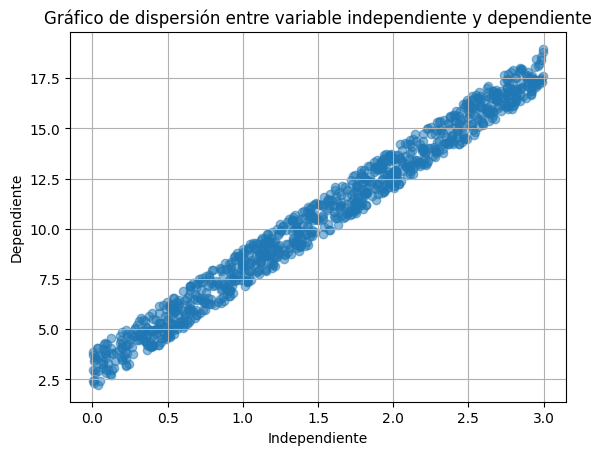

In [4]:
dispersión = plt.scatter(independiente, dependiente, alpha=0.5)

plt.title("Gráfico de dispersión entre variable independiente y dependiente")
plt.xlabel("Independiente")
plt.ylabel("Dependiente")
plt.grid(True)

plt.savefig("dispersión_tarea2.png")
plt.show()

función graficadora

In [5]:
def graficadora(independiente, dependiente, numero):
    x =np.random.uniform(1, 3, numero)

    intermedia = np.random.uniform(2, 4, numero)

    y = 5 + 2 * x + intermedia

    grafico_dispersion = plt.scatter(x, y, alpha = 0.5)
    plt.title(f" gráfico dispersión {independiente}, {dependiente}")
    plt.xlabel(f"{independiente}")
    plt.ylabel(f"{dependiente}")
    plt.grid(True)
    
    plt.savefig(f"gráfico dispersión {independiente}-{dependiente}.png")

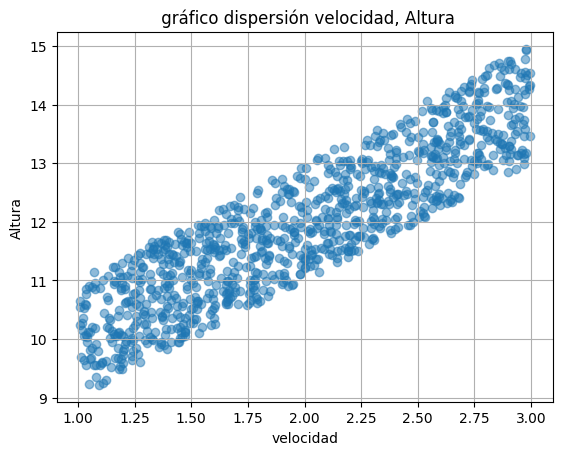

In [6]:
graficadora("velocidad", "Altura", 1000)

regresiones

In [7]:
independiente2=independiente.reshape(-1, 1)

X = np.hstack((np.ones((1000, 1)), independiente2))

In [8]:
beta = np.linalg.inv(X.T @ X) @ X.T @ dependiente

In [9]:
def regresion(independiente, dependiente):
    independiente=independiente.reshape(-1, 1)

    X = np.hstack((np.ones((1000, 1)), independiente))

    beta = np.linalg.inv(X.T @ X) @ X.T @ dependiente
    return beta



In [10]:
valores=regresion(independiente, dependiente)

In [11]:
valores

array([3.01497831, 4.97780875])

In [12]:
def graficadora_regresion(independiente, dependiente, beta):
    plt.scatter(independiente, dependiente)
    x_pred = np.linspace(0, 4, 1000).reshape(-1, 1)
    y_pred = beta[0] + beta[1] * x_pred
    plt.plot(x_pred, y_pred, 'r-')

    plt.savefig("grafico con línea.png")

Implementación graficadora

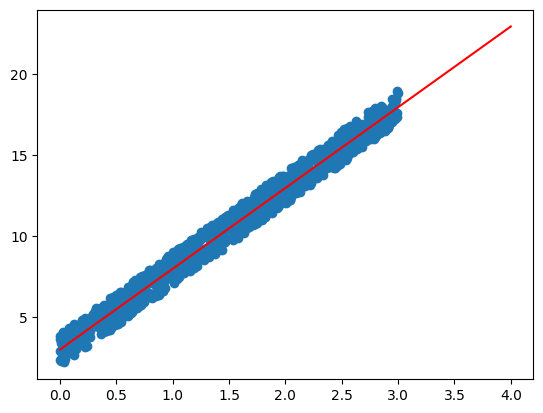

In [13]:
graficadora_regresion(independiente, dependiente, valores)

función de clases

In [14]:
class regresion_lineal(): # Instrucción de la actividad 2.1.8
    def __init__(self, planilla_datos=None):
        if isinstance(planilla_datos, pd.DataFrame):
            self.datos = planilla_datos
        elif isinstance(planilla_datos, str):
            self.datos= pd.read_csv(planilla_datos)
        self.reales = planilla_datos is not None

    def datos_simulados(self, numero):
        independiente= np.random.uniform(0, 3, numero)
        auxiliar=np.random.uniform(2, 4, numero)
        dependiente= 5+2*independiente+auxiliar
        return independiente, dependiente
    
    def graficadora(self, nombre_independiente, nombre_dependiente, numero, simulado = False):
        if simulado:
            independiente, dependiente = self.datos_simulados(numero)
        else:
            independiente = self.datos[nombre_independiente].values
            dependiente = self.datos[nombre_dependiente].values

        plt.scatter(independiente, dependiente, alpha=0.5)
        plt.title(f"Gráfico de dispersión {nombre_independiente}-{nombre_dependiente}")
        plt.xlabel(nombre_independiente)
        plt.ylabel(nombre_dependiente)
        plt.grid(True)

        plt.savefig(f"Gráfico de dispersión {nombre_independiente}-{nombre_dependiente}")

    def regresion(self, independiente, dependiente):
        independiente=independiente.reshape(-1, 1)
        independiente_x=np.hstack((np.ones((len(independiente), 1)), independiente))

        #cálculo beta
        beta = np.linalg.inv(independiente_x.T @ independiente_x) @ independiente_x.T @ dependiente
        return beta

    def graficadora_linea(self, independiente, dependiente, beta):
        plt.scatter(independiente, dependiente, alpha = 0.5)
        ind_pred = np.linspace(min(independiente), max(independiente), 100).reshape(-1, 1)
        dep_pred = beta[0] + beta[1] * ind_pred
        plt.plot(ind_pred, dep_pred, "r-")
        plt.title("Gráfico de dispersión con línea de regresión")
        plt.xlabel("Independiente")
        plt.ylabel("Dependiente")
        plt.grid(True)
        plt.savefig("Gráfico con línea de regresión.png")
    
    def analizar(self, nombre_independiente=None, nombre_dependiente=None, numero=None, simulado =False):
        if simulado:
            independiente, dependiente = self.datos_simulados(numero)
        else:
            independiente=self.datos[nombre_independiente].values
            dependiente=self.datos[nombre_dependiente].values

        self.graficadora(nombre_independiente, nombre_dependiente, numero, simulado)

        beta=self.regresion(independiente, dependiente)
        self.graficadora_linea(independiente, dependiente, beta)
        print(f"cof regresión: {beta}")

Implementación con datos simulados y datos reales

cof regresión: [7.91471646 2.04955861]


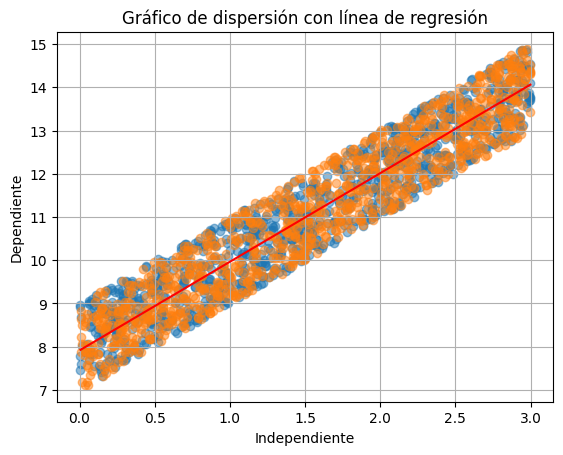

In [15]:
simulados=regresion_lineal()
simulados.analizar("Velocidad", "Tamaño", 1000, simulado=True)



Análisis con datos reales

In [16]:
df=pd.read_csv("measurements.csv") # Instrucción de la actividad 2.2.1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [17]:
df['distance']=df['distance'].str.replace(",", ".").astype("float")

df['consume']=df['consume'].str.replace(",", ".").astype("float")
# El dataframe se debio importar previamente a su uso en la clase puesto que se debieron hacer unas modificaciones en las variables de trabajo.
# Se sustituyeros las comas por punto y se convirtieron los datos a valores flotantes. Esto conllevo una modificacion a la clase puesto que ahora esta acepta ahora dataframe importados directamente como previamente instanciados ademas de valores simulados.

cof regresión: [ 5.02789331 -0.00587814]


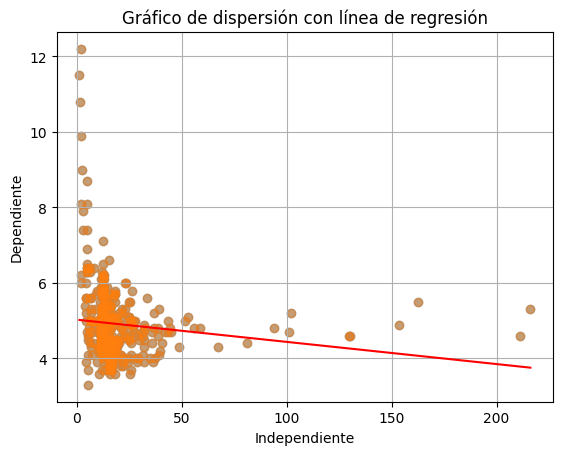

In [18]:
analisis=regresion_lineal(planilla_datos= df) # Instrucción de la actividad 2.2.2

analisis.analizar(nombre_independiente='distance', nombre_dependiente='consume', simulado=False) # Instrucción de la actividad 2.2.3

Polynomiales

In [19]:
independiente_r=df[['distance']].values
dependiente=df['consume'].values

#modelo = LinearRegression()
#modelo.fit(independiente_r, dependiente)

In [20]:
#Definimos polynomios
#para poder nombrar los gráficos definimos grado como variable
grado = 3 # Instrucción de la actividad 2.2.5 (Se debe modificar)
polynomial_f = PolynomialFeatures(degree=grado, include_bias=False) # Instrucción de la actividad 2.2.4

ind_polynomial = polynomial_f.fit_transform(independiente_r)

#probamos modelo:

modelo_polynomial=LinearRegression()
modelo_polynomial.fit(ind_polynomial, dependiente)

#Valores del modelo polynomial

int_poli=modelo_polynomial.intercept_
coef=modelo_polynomial.coef_


In [21]:
#Probamos la predicción.

dependiente_pred = modelo_polynomial.predict(ind_polynomial)

#Estadísticas para evaluar:

r2 = r2_score(dependiente, dependiente_pred)
mse = mean_squared_error(dependiente, dependiente_pred)
mae = mean_absolute_error(dependiente, dependiente_pred)
rmse = np.sqrt(mse)


print(f"R cuadrado: {r2}, Error cuadrático medio: {mse}, error absoluto medio: {mae}, raíz del error cuadrático medio {rmse}")

R cuadrado: 0.16374460149496128, Error cuadrático medio: 0.8903546968912681, error absoluto medio: 0.6741376852948605, raíz del error cuadrático medio 0.9435860834557005


graficación polynomial

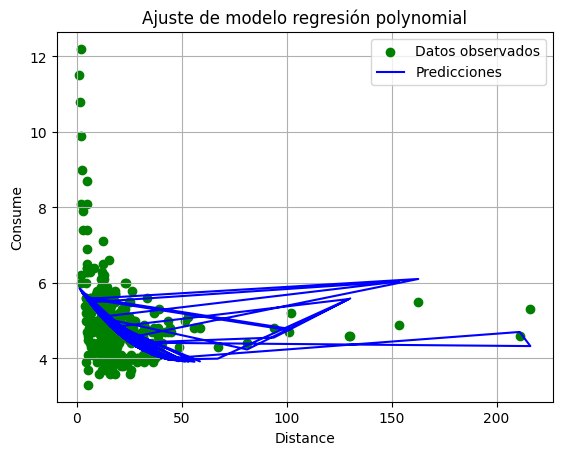

In [22]:
#graficamos con curvas de observados y predicciones. # Instrucción de la actividad 2.2.6

plt.scatter(independiente_r, dependiente, color ="green", label ="Datos observados")
plt.plot(independiente_r, dependiente_pred, color="blue", label ="Predicciones")
plt.title("Ajuste de modelo regresión polynomial")
plt.xlabel("Distance")
plt.ylabel("Consume")
plt.grid(True)
plt.legend()
plt.savefig(f"polynomial grado {grado}.png")


A mayor grado, el error cuadrático medio  disminuye considerablemente. Mientras que a menor grado, el error cuadrático medio aumenta.
Con una cifra mayor en el grado, la línea de predicción se ajusta mas (menos dispersión), por lo que, hace un sobreajuste (overfitting) de la predicción (no tan recomendado). Mientras que a cifras menores en el grado, la línea de predicción tiene una dispersión mayor.

regresiones bonus

In [23]:
#Separamos en train y test. Usamos los datos de la base csv / # Instrucción de la actividad 2.3.1
ind_train, ind_test, dep_train, dep_test = train_test_split(independiente_r, dependiente, test_size=0.2, random_state=25)

grado2=6 # Instrucción de la actividad 2.3.2
polynomial_f2 = PolynomialFeatures(degree=grado2, include_bias=False)
ind_train_poly = polynomial_f2.fit_transform(ind_train)
ind_test_poly = polynomial_f2.transform(ind_test)

#Probamos distintos valores de alpha para la penalización. # Instrucción de la actividad 2.3.3

alphas=[0.1, 1, 3, 5, 10, 30, 50]

In [24]:
ridge_ecm =[]
lasso_ecm =[]

for alpha in alphas:
    modelo_ridge= Ridge(alpha=alpha)
    modelo_ridge.fit(ind_train_poly, dep_train)
    dep_pred_ridge= modelo_ridge.predict(ind_test_poly)
    ridge_ecm.append(mean_squared_error(dep_test, dep_pred_ridge))


    #Dice que debemos aumentar iteraciones para lograr convergencia
    modelo_lasso=Lasso(alpha= alpha, max_iter=20000)
    modelo_lasso.fit(ind_train_poly, dep_train)
    dep_pred_lasso= modelo_lasso.predict(ind_test_poly)
    lasso_ecm.append(mean_squared_error(dep_test, dep_pred_lasso))

    

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.07519e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e+02, tolerance: 3.190e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.07979e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coord

In [25]:
ridge_ecm

[np.float64(0.6153687862383145),
 np.float64(0.6158073422569773),
 np.float64(0.6167815919335167),
 np.float64(0.6177552991459755),
 np.float64(0.6201864090937895),
 np.float64(0.6298366145136247),
 np.float64(0.6393067880247376)]

In [26]:
lasso_ecm

[np.float64(0.8170106608193242),
 np.float64(1.0938823702708607),
 np.float64(1.1108155857711035),
 np.float64(1.1136844323835773),
 np.float64(1.1215593953012204),
 np.float64(1.163099742374595),
 np.float64(1.194917766546151)]

Gráfico de alphas y error

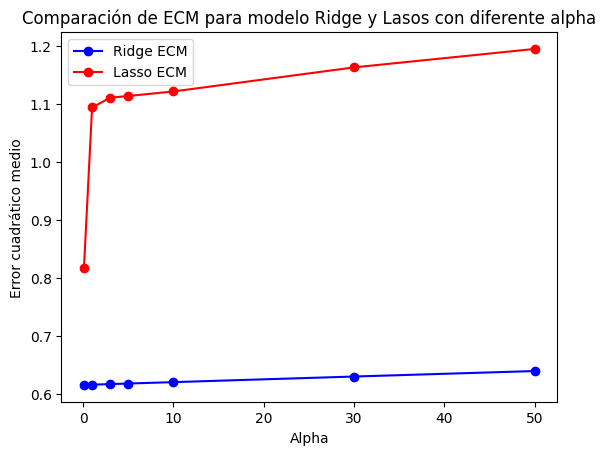

In [27]:
plt.plot(alphas, ridge_ecm, label ="Ridge ECM", marker="o", color="b", linestyle="-")
plt.plot(alphas, lasso_ecm, label ="Lasso ECM", marker="o", color="r", linestyle="-")
plt.xlabel("Alpha")
plt.ylabel("Error cuadrático medio")
plt.title("Comparación de ECM para modelo Ridge y Lasos con diferente alpha")
plt.legend()
plt.savefig("alpha y error modelos Lasso y Ridge.png")
plt.show()

 ¿Que ocurre al aumentar el valor de alfa (penalización) en cada modelo?
Al aumentar el valor de alfa se logra percibir un grado mayor de error cuadratico medio incluso del valor menor de lasso en camparación al mayor de ridge.Tambien el grado de error cuadratico medio en lasso para cado valor asignado siempre es mayor al error cuadratico que entrega el modelo de ridge.

¿Que diferencia se observa entre ridge y lasso?
Se observa que el modelo de ridge es más confiable a nuevos valores. Es decir, su error cuadratico medio es menor.